# Machine learning models
Dieses Projekt bietet eine vielfältige Auswahl an Klassifikationsmodellen für maschinelles Lernen. Benutzer können Modelle manuell auswählen oder sich basierend auf ihren spezifischen Anforderungen und Analysebedürfnissen für eine automatische Auswahl entscheiden.

### Bibliotheken importieren

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from tpot import TPOTClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, StackingClassifier, BaggingClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import tkinter as tk
from tkinter import filedialog, messagebox

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')


C:\Users\HP\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [4]:
#!pip install --upgrade tpot

###  Daten laden und analysieren
Hier wird der Datensatz analysiert und überprüft, ob fehlende Werte (z. B. NaN) oder doppelte Zeilen vorhanden sind

In [6]:
def laden():
    # Zeige eine Nachricht an
    messagebox.showinfo("Dateiauswahl", "Bitte wählen Sie eine Datei aus.")
    
    # Datei auswählen
    filepath = filedialog.askopenfilename()
    if not filepath:
        print("Keine Datei ausgewählt.")
        return None
    
    # CSV-Datei lesen
    df = pd.read_csv(filepath)
    
    # Hier kannst du deine Funktion aufrufen, z. B.:
    data = Data_imputation(df)
    print("Imputation abgeschlossen.")
    
    return data

# Hauptfenster initialisieren
root = tk.Tk()
root.withdraw()  # Das Hauptfenster ausblenden


''

### Analyse und Überprüfung des Datensatzes auf fehlende Werte und Dubletten

In [8]:
def Data_imputation(data):
    # Überprüfen, ob data DataFrame ist
    if not isinstance(data, pd.DataFrame):
        print('Die eingegebenen Daten sind kein DataFrame. Bitte konvertieren Sie die Daten zuerst in ein DataFrame.')
        return None 
#
    # Fragen, ob der Datensatz angezeigt werden soll
    anzeigen = input('Möchten Sie die Daten anzeigen? (ja/nein): ').strip().lower()
    if anzeigen == 'ja':
        print('\nHier ist der Datensatz als DataFrame:')
        from IPython.display import display  # Optional für bessere Darstellung in Jupyter Notebook
        display(data)
    elif anzeigen == 'nein':
        print('\nDie Daten werden nicht angezeigt.')
    else:
        print('Ungültige Eingabe. Es wird davon ausgegangen, dass die Daten nicht angezeigt werden.')
    
    # Fragen, ob der Analyseprozess fortgesetzt werden soll
    weiter_analyse = input('Möchten Sie mit der Analyse fortfahren? (ja/nein): ').strip().lower()
    if weiter_analyse == 'nein':
        print('Der Prozess wurde beendet.')
        return None
    elif weiter_analyse != 'ja':
        print('Ungültige Eingabe. Der Prozess wird beendet.')
        return None#    
    # Allgemeine Informationen zum Datensatz
    print('\n1. Allgemeine Informationen zum Datensatz:')
    print(data.info())

    # Überprüfung auf fehlende Werte
    print('\n2. Überprüfung auf fehlende Werte:')
    missing_values = data.isnull().sum().sum()
    if missing_values > 0:
        print(data.isnull().sum()) 
    else:
        print('Es gibt keine fehlenden Werte.')

    # Überprüfung auf doppelte Zeilen
    print('\n3. Überprüfung des Duplikates:')
    duplicated_rows = data.duplicated().sum()
    if duplicated_rows > 0:
        print(f'Es gibt {duplicated_rows} doppelte Zeilen.')
        drop_duplicates = input('Möchten Sie die doppelten Zeilen entfernen? (ja/nein): ').strip().lower()
        if drop_duplicates == 'ja':
            data = data.drop_duplicates()
            print('Die doppelten Zeilen wurden entfernt.')
    else:
        print('Es gibt keine doppelten Zeilen.')

    # wenn keine fehlenden Werte oder Duplikat vorhanden sind
    if missing_values == 0 and duplicated_rows == 0:
        print('\nEs sind weder fehlende Werte noch doppelte Zeilen vorhanden. Es ist keine Imputation erforderlich.')
        return data
    else:
        print('\nFehlende Werte sind vorhanden und können durch die folgenden Methoden vervollständigt werden. ')
       
    # Imputationsmethoden
    while True:
        print('\nWähle eine Methode zur Imputation fehlender Werte:')
        print('1: Mean/Median/Mode Imputation (numerische Spalten)')
        print('2: Predictive Imputation (KNN, numerische Spalten)')
        print('3: Last Observation Carried Forward (LOCF, alle Spalten)')
        print('4: Mode Imputation (nicht-numerische Spalten)')
        
        method = input('Gib die Nummer der gewünschten Methode ein: ')
        
        if method not in ['1', '2', '3', '4']:
            print('Ungültige Eingabe. Bitte wähle eine gültige Methode aus.')
            continue

        # Implementierung der gewählten Imputationsmethode
        else:
            if method == '1':
                strategy = input('Wählen Sie Methode (mean/median/most_frequent): ').strip().lower()
                numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
                imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
                data[numeric_cols] = imputer.fit_transform(data[numeric_cols])
                print('\nDatensatz nach Mean/Median/Mode Imputation:')
                print(data)
                print(data.isnull().sum()) 

            elif method == '2':
                n_neighbors = int(input('Gib die Anzahl der Nachbarn für KNN ein: '))
                numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
                imputer = KNNImputer(n_neighbors=n_neighbors)
                data[numeric_cols] = imputer.fit_transform(data[numeric_cols])
                print('\nDatensatz nach Predictive Imputation (KNN):')
                print(data)
                print(data.isnull().sum())

            elif method == '3':
                data = data.fillna(method='ffill')  # LOCF
                print('\nDatensatz nach Last Observation Carried Forward (LOCF):')
                print(data)
                print(data.isnull().sum())

            elif method == '4':
                non_numeric_cols = data.select_dtypes(include=['object', 'category']).columns
                imputer = SimpleImputer(strategy='most_frequent')
                data[non_numeric_cols] = imputer.fit_transform(data[non_numeric_cols])
                print('\nDatensatz nach Mode Imputation (für nicht-numerische Spalten):')
                print(data)
                print(data.isnull().sum())

        # Frage, ob eine weitere Methode verwendet werden soll
        weitere_methode = input('Möchten Sie eine weitere Methode anwenden? (ja/nein): ').strip().lower()
        if weitere_methode == 'nein':
            print('Imputationsprozess abgeschlossen.')
            break

    # Wiederholte Abfrage, ob Spalten entfernt werden sollen
    while True:
        col_drop = input('Möchten Sie Spalten entfernen? (ja/nein): ').strip().lower()
        if col_drop == 'ja':
            while True:
                cols_Name = input('Geben Sie die Namen der Spalten ein (z.B Name, alter ....): ').strip().split(',')
                cols_Name = [col.strip() for col in cols_Name]  # Leerzeichen entfernen
                invalid_cols = [col for col in cols_Name if col not in data.columns]
            
                if invalid_cols:
                    print(f"Die folgenden Spalten existieren nicht im Datensatz: {', '.join(invalid_cols)}")
                    print("Bitte geben Sie gültige Spaltennamen ein.")
                else:
                    data = data.drop(columns=cols_Name)  # Entfernt gültige Spalten
                    print('Die ausgewählten Spalten wurden entfernt.')
                    print(data.info())
                    break
        elif col_drop == 'nein':
            print('Es werden keine weiteren Spalten entfernt.')
            break
    else:
        print('Ungültige Eingabe. Bitte antworten Sie mit ja oder nein.')
    return data


### Splitten der Daten in X (Inputs) und y (Output)
Hier wird der Datensatz in X (Inputs) und y (Output) splitten

In [10]:
def split_data(data):

    while True:
        output_cols = input('Geben Sie die Namen der Output-Spalten (y) ein: ')
    
        # Überprüfen, ob alle eingegebenen Output-Spalten im DataFrame existieren
        
        if output_cols not in data.columns:
            print('Geben Sie bitte einenerneut eingeben')
        else:
            break

    # Input-Spalten (alle Spalten außer den Output-Spalten)
    input_cols = [col for col in data.columns if col not in output_cols]
    
    # Splitten der Daten in X (Inputs) und y (Outputs)
    X = data[input_cols]
    y = data[output_cols]
    
    print('\nInputs (X):')
    print(X.head())
    print('\nOutputs (y):')
    print(y.head())

    return X, y

### Überprüfen des Datensatzes auf mögliche Fehler

In [12]:
#    Überprüft X und y auf mögliche Fehler, wie z.B. Strings in numerischen Spalten.
#   Gibt problematische Spalten/Werte aus und gibt die bereinigten Daten zurück.

def check_data_for_errors(X, y):

    print('\nÜberprüfung der Daten auf mögliche Fehler...\n')

    def check_columns(data, dataset_name):
        '''
        Hilfsfunktion zur Überprüfung der Spalten eines einzelnen Datensatzes.
        '''
        error_columns = []
        print(f'\nÜberprüfung von {dataset_name}...\n')
        for col in data.columns:
            try:
                # Teste, ob alle Werte in der Spalte in Floats umgewandelt werden können
                data[col].astype(float)
            except ValueError as e:
                error_columns.append(col)
                print(f'Fehler in {dataset_name}, Spalte {col}: {e}')
        return error_columns

    # Problematische Spalten finden
    problem_X = check_columns(X, 'X')
    problem_y = []

    # Überprüfung für y
    try:
        y.astype(float)
    except ValueError as e:
        problem_y.append('y')
        print(f'Fehler in y: {e}')

    # Zusammenfassung der problematischen Spalten/Werte
    if problem_X or problem_y:
        print('\nZusammenfassung der problematischen Spalten/Werte:')
        if problem_X:
            print(f'X: {', '.join(problem_X)}')
        if problem_y:
            print('y enthält problematische Werte.')
        
        # Benutzeroptionen
        action = input('Möchten Sie die problematischen Spalten löschen oder bearbeiten? (löschen/bearbeiten): ').strip().lower()
        while action not in ['löschen', 'bearbeiten', '']:
            action = input('Ungültige Eingabe. Bitte wählen Sie löschen oder bearbeiten: ').strip().lower()
        
        if action == 'löschen':
            X = X.drop(columns=problem_X)
            print('Die problematischen Spalten wurden aus X entfernt.')
        elif action == 'bearbeiten':
            print('Bitte bearbeiten Sie die problematischen Spalten oder Werte manuell.')
        else:
            print('Keine Aktion wurde ausgeführt.')
    else:
        print('Es wurden keine problematischen Spalten oder Werte gefunden. Alle Daten scheinen in Ordnung zu sein.')
    
    return X, y

### feature Scaling

In [14]:
def feature_scaling(X_train, X_test):
    Feature_Scaling = input('\nMöchten Sie ein Feature-Scaling durchführen (Ja/Nein): ')
    if Feature_Scaling.lower() == 'ja':
        Feature_Scaling_Methode = input('\nWelche Methode möchten Sie durchführen (Standardization/Normalization)?: ')
        while Feature_Scaling_Methode.lower() not in ['standardization', 'normalization']:
            print('Wählen Sie eine Methode von der Liste aus.')
            Feature_Scaling_Methode = input('\nWelche Methode möchten Sie durchführen (Standardization/Normalization)?: ')
                
        if Feature_Scaling_Methode.lower() == 'standardization':
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        elif Feature_Scaling_Methode.lower() == 'normalization':
            min_max_scaler = MinMaxScaler()
            X_train = min_max_scaler.fit_transform(X_train)
            X_test = min_max_scaler.transform(X_test)
    
    return X_train, X_test

## Model-Aufbau

### automatisches Auswahl

In [17]:
# automatisches Auswahl
def model_TPOTClassifier(X_train,y_train):
    tpot = TPOTClassifier(generations=8, population_size=20, verbosity=2)
    tpot.fit(X_train, y_train)


### LogisticRegression

In [19]:
# LogisticRegression
def model_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Ergebnisse auswerten
    print('\nKlassifikationsbericht:')
    print(classification_report(y_test, y_pred))

    print('\nKonfusionsmatrix:')
    print(confusion_matrix(y_test, y_pred))

    return model  # <-- Hier geben wir das Modell zurück!
  

### Support Vector Machines

In [21]:
# Support Vector Machines
def model_svm(X_train, y_train, X_test, y_test):
    param_grid = {'C': [0.1, 1, 10],
                  'gamma': ['scale', 'auto'],
                  'kernel': ['linear', 'rbf']}
    
    grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Ergebnisse auswerten
    print('\nKlassifikationsbericht:')
    print(classification_report(y_test, y_pred))
    print('\nKonfusionsmatrix:')
    print(confusion_matrix(y_test, y_pred))
    return best_model

### K-Nearest Neighbors

In [23]:
# K-Nearest Neighbors
def model_knn(X_train, y_train, X_test, y_test):
    param_grid = {'n_neighbors': np.arange(1, 31),
                  'weights': ['uniform', 'distance']}
    
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=0)
    grid.fit(X_train, y_train)
    
    best_knn = grid.best_estimator_
    y_pred   = best_knn.predict(X_test)
    
    # Ergebnisse auswerten
    print('\nKlassifikationsbericht:')
    print(classification_report(y_test, y_pred))
    print('\nKonfusionsmatrix:')
    print(confusion_matrix(y_test, y_pred))
    return best_knn

### Naive Bayes ( GaussianNB)

In [25]:
# Naive Bayes ( GaussianNB)
def model_gaussian_nb(X_train, y_train, X_test, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    # Ergebnisse auswerten
    print('\nKlassifikationsbericht:')
    print(classification_report(y_test, y_pred))
    print('\nKonfusionsmatrix:')
    print(confusion_matrix(y_test, y_pred))
    return model

### Decision Trees

In [27]:
# Decision Trees
def model_decision_tree(X_train, y_train, X_test, y_test):
    param_grid = {'max_depth': [3, 4, 5, 6, 7, None],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'criterion': ['gini', 'entropy']}
    
    grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    #print('Best parameters found: ', grid_search.best_params_)
    #print('Best score: ', grid_search.best_score_)

    y_pred   = grid_search.best_estimator_.predict(X_test)
    
    # Ergebnisse auswerten
    print('\nKlassifikationsbericht:')
    print(classification_report(y_test, y_pred))
    print('\nKonfusionsmatrix:')
    print(confusion_matrix(y_test, y_pred))    
    return grid_search.best_estimator_

### Random forest

In [29]:
# Random forest
def model_Random_forest(X_train, y_train, X_test, y_test):
    param_grid = {
    'n_estimators': [10,100, 200, 300],
    #'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
    }

    # Erstelle das GridSearchCV-Objekt
    grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

    # Führe Grid Search aus
    grid_search.fit(X_train, y_train)

    # Beste Parameter
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred   = best_model.predict(X_test)

    # Ergebnisse auswerten
    mse      = mean_squared_error(y_test,y_pred)
    mae      = mean_absolute_error(y_test,y_pred)
    score_r2 = r2_score(y_test,y_pred)
    rmse     = root_mean_squared_error(y_test,y_pred)

    #print(mse)
    #print(mae)
    print(f'score_r2 = {score_r2}')
    #print(rmse)
    return best_model

### Max Voting

In [31]:
def model_Max_Voting(model_switch, X_train, y_train, X_test, y_test):
    print('Max Voting wurde ausgewählt.')
    
    # Benutzer kann die Modelle auswählen
    print('\nVerfügbare Modelle:')
    for key, model_function in model_switch.items():
        if key not in ['6', '7', '8', '9', '10']:  
            print(f'{key}: {model_function.__name__}')
    
    selected_models = input('\nBitte wählen Sie die Modelle für Max Voting (z.B. 1,2,3): ').split(',')
    selected_models = [m.strip() for m in selected_models]  # Entfernen von Leerzeichen

    # Überprüfen der Gültigkeit der Eingaben
    valid_models = []
    for model_key in selected_models:
        if model_key in model_switch and model_key != '7' :
            valid_models.append(model_key)
        else:
            print(f'Modell {model_key} ist ungültig und wird übersprungen.')

    if not valid_models:
        print('Keine gültigen Modelle ausgewählt. Abbruch.')
        return None

    # Training der ausgewählten Modelle und Sammeln der Vorhersagen
    predictions = []
    for model_key in valid_models:
        model_function = model_switch[model_key]  # Funktion aus model_switch abrufen
        print(f'Training Modell {model_key} ({model_function.__name__})...')
        trained_model = model_function(X_train, y_train, X_test, y_test)  # Modell trainieren
        y_pred = trained_model.predict(X_test)
        predictions.append(y_pred)
    
    # Umwandlung der Vorhersagen in ein NumPy-Array
    predictions = np.array(predictions)

    # Berechnung der finalen Vorhersage mit mode()
    from scipy.stats import mode
    final_pred, _ = mode(predictions, axis=0)

    # Sicherstellen, dass final_pred die richtige Form hat
    final_pred = final_pred.ravel()

    print('Final Prediction:')
    print(final_pred)

    print('\nKlassifikationsbericht:')
    print(classification_report(y_test, final_pred))
    print('\nKonfusionsmatrix:')
    print(confusion_matrix(y_test, final_pred))
    print('\nMax Voting: Max Voting ist eine Voting-Methode, bei der mehrere Modelle trainiert werden und die Klasse mit den meisten Stimmen als endgültige Vorhersage ausgewählt wird. Es wird häufig in Klassifikationsproblemen verwendet.')
    return final_pred


### Stacking

In [33]:
# Funktion für Stacking
def model_Stacking(model_switch, X_train, y_train, X_test, y_test):
    print('Stacking wurde ausgewählt.')
    
    # Benutzer kann die Modelle auswählen
    print('\nVerfügbare Modelle:')
    for key in model_switch:
        if key != '6' and key != '7' and key != '8' and key != '9' and key != '10': 
            print(f'{key}: {model_switch[key].__name__}')
    
    selected_models = input('\nBitte wählen Sie die Modelle für Stacking (z.B. 1,2,3): ').split(',')
    selected_models = [m.strip() for m in selected_models]  # Entfernen von Leerzeichen
    print(selected_models)
    # Überprüfen der Gültigkeit der Eingaben
    valid_models = []
    for model_key in selected_models:
        if model_key in model_switch and model_key != '8':
            valid_models.append(model_key)
        else:
            print(f'Modell {model_key} ist ungültig und wird übersprungen.')

    if not valid_models:
        print('Keine gültigen Modelle ausgewählt. Abbruch.')
        return None

    # Training der ausgewählten Modelle und Sammeln der Modelle für Stacking
    base_models = []
    for model_key in valid_models:
        model_function = model_switch[model_key]  # Funktion aus model_switch abrufen
        print(f'Training Modell {model_key} ({model_function.__name__})...')
        trained_model = model_function(X_train, y_train, X_test, y_test)  # Modell trainieren
        base_models.append((f'model_{model_key}', trained_model))
    print(base_models)
    # Definition des Meta-Modells
    meta_model = LogisticRegression()

    # Erstellen des Stacking Classifiers
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

    # Training des Stacking Classifiers
    stacking_clf.fit(X_train, y_train)

    # Vorhersage mit dem Stacking Classifier
    y_pred = stacking_clf.predict(X_test)

    # Evaluierung des Modells
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Stacking Classifier Accuracy: {accuracy}')
    print('\nKlassifikationsbericht:')
    print(classification_report(y_test, y_pred))
    print('\nKonfusionsmatrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nStacking: Stacking kombiniert die Ergebnisse mehrerer Modelle, indem ihre Vorhersagen als Eingabe für ein Metamodell genutzt werden. Das Ziel ist es, die Stärken der einzelnen Modelle zu vereinen und eine bessere Leistung zu erzielen.')


###  Bagging

In [35]:
# Funktion Bagging
def model_Bagging(model_switch, X_train, y_train, X_test, y_test):

    print('Bagging wurde ausgewählt.')
    
    # Benutzer kann die Modelle auswählen
    print('\nVerfügbare Modelle:')
    for key in model_switch:
        if key != '6' and key != '7' and key != '8' and key != '9' and key != '10' : 
            print(f'{key}: {model_switch[key].__name__}')
    
    selected_models = input('\nBitte wählen Sie ein Modell für Bagging : ').split(',')
    selected_models = [m.strip() for m in selected_models]  # Entfernen von Leerzeichen
    print(selected_models)
    
    # Überprüfen der Gültigkeit der Eingaben
    valid_models = []
    for model_key in selected_models:
        if model_key in model_switch and model_key != '9':
            valid_models.append(model_key)
        else:
            print(f'Modell {model_key} ist ungültig und wird übersprungen.')

    if not valid_models:
        print('Keine gültigen Modelle ausgewählt. Abbruch.')

    # Training der ausgewählten Modelle und Sammeln der Modelle für Bagging
    model_function = model_switch[model_key]  
    print(f'Training Modell {model_key} ({model_function.__name__})...')
    trained_model = model_function(X_train, y_train, X_test, y_test) 
    #print(trained_model)
    # Hyperparameter-Raster für BaggingClassifier
    bc_params = {
        'n_estimators': [10, 20, 30],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0]
    }
    
    # Grid Search für BaggingClassifier
    bagging_clf = BaggingClassifier(trained_model)
    bc_gs = GridSearchCV(bagging_clf, bc_params, cv=5, verbose=1)

    bc_gs.fit(X_train, y_train)
    y_pred = bc_gs.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'BaggingClassifier Accuracy: {accuracy}')
    print('\nKlassifikationsbericht:')
    print(classification_report(y_test, y_pred))
    print('\nKonfusionsmatrix:')
    print(confusion_matrix(y_test, y_pred))
print('\nBagging: Bagging steht für Bootstrap Aggregating und verwendet mehrere unabhängige Modelle, die auf zufälligen Datenstichproben trainiert werden. Die Vorhersagen der Modelle werden aggregiert, um die Varianz zu reduzieren und die Gesamtleistung zu verbessern. Ein bekanntes Beispiel ist der Random Forest.')


Bagging: Bagging steht für Bootstrap Aggregating und verwendet mehrere unabhängige Modelle, die auf zufälligen Datenstichproben trainiert werden. Die Vorhersagen der Modelle werden aggregiert, um die Varianz zu reduzieren und die Gesamtleistung zu verbessern. Ein bekanntes Beispiel ist der Random Forest.


### Boosting

In [37]:
# Funktion Boosting
def model_Boosting(model_switch, X_train, y_train, X_test, y_test):
    print('Boosting wurde ausgewählt.')
    # Hyperparameter-Raster für GradientBoostingClassifier
    gbc_params = {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_features': [None, 'sqrt', 'log2'],
         'max_depth': [3, 5, 7],
        #'min_samples_split': [2, 5, 10],
        #'min_samples_leaf': [1, 2, 4]
    }
    
    # Grid Search für GradientBoostingClassifier
    gbc = GradientBoostingClassifier(random_state=100)
    gbc_gs = GridSearchCV(gbc, gbc_params, cv=5, verbose=1, n_jobs=-1)

    gbc_gs.fit(X_train, y_train)

    y_pred = gbc_gs.predict(X_test)

    # Modell evaluieren
    accuracy = accuracy_score(y_test, y_pred)
    print(f'GradientBoostingClassifier Accuracy: {accuracy}')
    print('\nKlassifikationsbericht:')
    print(classification_report(y_test, y_pred))
    print('\nKonfusionsmatrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nBoosting: Boosting ist eine iterative Methode, bei der schwache Modelle (z. B. Entscheidungsbäume mit geringer Tiefe) nacheinander trainiert werden. Jedes neue Modell versucht, die Fehler des vorherigen Modells zu korrigieren. Am Ende werden die Ergebnisse der Modelle gewichtet kombiniert, um eine bessere Gesamtleistung zu erzielen. Bekannte Algorithmen: AdaBoost, Gradient Boosting.')
    return gbc_gs

### validation_techniques

In [39]:

def validation_techniques(method, model, X, y):
    if model is None:
        print('Fehler: Kein trainiertes Modell übergeben!')
        return
    
    print(f'Validierungsmethode: {method}')
    
    if method == '1':  # K-Fold Cross Validation
        print('\nK-fold Cross-Validation: Die Daten werden in '
              'k gleich große Teile (Folds) aufgeteilt. Ein Fold wird als Testdatensatz verwendet, '
              'während die restlichen k-1 Folds als Trainingsdatensatz genutzt werden. Der Prozess wird '
              'k-mal wiederholt, wobei jedes Mal ein anderer Fold als Testdatensatz dient. Am Ende werden '
              'die Ergebnisse gemittelt, um die Gesamtleistung zu berechnen.')
        kfold = KFold(n_splits=10, shuffle=True, random_state=1)
        results = cross_val_score(model, X, y, cv=kfold)

    elif method == '2':  # Stratified K-Fold Cross Validation
        print('\nStratified K-fold Cross-Validation: Funktioniert ähnlich wie K-fold, stellt jedoch sicher, '
              'dass in jedem Fold die Klassenverteilung gleich bleibt wie im gesamten Datensatz. '
              'Dies ist besonders hilfreich bei unausgewogenen Datensätzen, um aussagekräftigere Ergebnisse zu erhalten.')
        skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
        results = cross_val_score(model, X, y, cv=skfold)

    elif method == '3':  # Leave-One-Out Cross Validation
        print('\nLOOCV (Leave-One-Out Cross-Validation): Eine Extremform von K-fold, bei der '
              'k = n (die Anzahl der Datenpunkte). Jeder einzelne Datenpunkt wird einmal als Testdatensatz verwendet, '
              'während die übrigen n-1 Datenpunkte als Trainingsdatensatz dienen. '
              'Dies ist rechenintensiv, liefert aber oft präzisere Ergebnisse.')
        loo = LeaveOneOut()
        results = cross_val_score(model, X, y, cv=loo)

    elif method == '4':  # Leave-P-Out Cross Validation
        print('\nLPOCV (Leave-P-Out Cross-Validation): Eine Verallgemeinerung von LOOCV. Statt einen Punkt zu entfernen, werden '
              'p Punkte als Testdatensatz genutzt und die restlichen n-p Punkte als Trainingsdatensatz. '
              'Die Methode ist flexibel, aber aufgrund der hohen Anzahl möglicher Kombinationen oft rechenaufwendig.')
        lpo = LeavePOut(p=5)
        results = cross_val_score(model, X, y, cv=lpo)
    elif method == '5':  # Repeated Random Test-Train Splits
        print('\nRRTTS (Repeated Random Train-Test Split): Ähnlich wie ein einfacher Train-Test-Split, '
              'bei dem der Datensatz in Trainings- und Testdatensatz aufgeteilt wird. '
              'Dieser Vorgang wird jedoch mehrmals mit unterschiedlichen Zufallsaufteilungen wiederholt, '
              'und die Ergebnisse werden gemittelt. Dies reduziert die Varianz, die durch eine einzige Aufteilung entstehen könnte.')
        ssplit = ShuffleSplit(n_splits=20, test_size=0.20, random_state=1)
        results = cross_val_score(model, X, y, cv=ssplit)

    else:
        print('Bitte eine gültige Methode wählen.')
        return
    
    print('\nErgebnisse der Validation:')
    print(results)
    print('\nDurchschnittliche Genauigkeit:', np.mean(results))


In [40]:
# Funktion für Validierungstechniken
def validierung_technik_prozess(trained_model, X, y):
    val_techniques = input('\nAls Validierungstechnik wurde die Methode Train-Test-Split durchgeführt. Möchten Sie eine andere Validierungstechnik verwenden? (Ja/Nein): ')
    if val_techniques.lower() == 'ja':
        print('Wählen Sie eine Methode (1-5):')
        print('1: K-fold')
        print('2: Stratified K-fold')
        print('3: LOOCV')
        print('4: LPOCV')
        print('5: RRTTS')

        val_techniques_wahl = input()
        valid_choices = ['1', '2', '3', '4', '5']
        while val_techniques_wahl not in valid_choices:
            print('\nWählen Sie bitte eine Methode von der Liste aus.')
            val_techniques_wahl = input()

        print('Das kann etwas länger dauern...')
        validation_techniques(val_techniques_wahl, trained_model, X, y)

In [41]:
def modell_auswahl_und_ausfuehrung(model_switch, X_train, y_train, X_test, y_test, model_wahl):
    spezial_modelle = {
        '7': 'Max Voting',
        '8': 'Stacking',
        '9': 'Bagging',
        '10': 'Boosting'
    }

    if model_wahl in spezial_modelle:
        final_prediction = model_switch[model_wahl](model_switch,X_train, y_train, X_test, y_test)
        return final_prediction
    else:
        print('Das ausgewählte Modell wird verarbeitet und kann etwas länger dauern')
        model_function = model_switch[model_wahl]
        trained_model = model_function(X_train, y_train, X_test, y_test)
        return trained_model

Möchten Sie die Daten anzeigen? (ja/nein):  ja



Hier ist der Datensatz als DataFrame:


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


Möchten Sie mit der Analyse fortfahren? (ja/nein):  ja



1. Allgemeine Informationen zum Datensatz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  f

Gib die Nummer der gewünschten Methode ein:  3



Datensatz nach Last Observation Carried Forward (LOCF):
       customer_id  vintage  age  gender  dependents     occupation    city  \
0                1     2101   66    Male         0.0  self_employed   187.0   
1                2     2348   35    Male         0.0  self_employed   187.0   
2                4     2194   31    Male         0.0       salaried   146.0   
3                5     2329   90    Male         0.0  self_employed  1020.0   
4                6     1579   42    Male         2.0  self_employed  1494.0   
...            ...      ...  ...     ...         ...            ...     ...   
28377        30297     2325   10  Female         0.0        student  1020.0   
28378        30298     1537   34  Female         0.0  self_employed  1046.0   
28379        30299     2376   47    Male         0.0       salaried  1096.0   
28380        30300     1745   50    Male         3.0  self_employed  1219.0   
28381        30301     1175   18    Male         0.0        student  1232.

Möchten Sie eine weitere Methode anwenden? (ja/nein):  nein


Imputationsprozess abgeschlossen.


Möchten Sie Spalten entfernen? (ja/nein):  nein


Es werden keine weiteren Spalten entfernt.
Imputation abgeschlossen.


Geben Sie die Namen der Output-Spalten (y) ein:  churn



Inputs (X):
   customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed   187.0   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90   Male         0.0  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  \
0                     2          755          1458.71   
1                     2         3214          5390.37   
2                     2           41          3913.16   
3                     2          582          2291.91   
4                     3          388           927.72   

   previous_month_end_balance  average_monthly_balance_prevQ  \
0                     1458.71                        1458.71   
1                     8704.66                        7799.26   
2      

Möchten Sie die problematischen Spalten löschen oder bearbeiten? (löschen/bearbeiten):  löschen


Die problematischen Spalten wurden aus X entfernt.



Möchten Sie ein Feature-Scaling durchführen (Ja/Nein):  nein
Soll das ML-Modell automatisch oder manuell ausgewählt werden?:  m



Wählen Sie ein Modell (1-10):
1: Logistic Regression
2: Support Vector Machines
3: K-Nearest Neighbors
4: Naive Bayes
5: Decision Trees
6: Random Forest
7: Max Voting
8: Model Stacking
9: Model Bagging
10: Model Boosting


 7


Sie haben Modell 7 gewählt.
Max Voting wurde ausgewählt.

Verfügbare Modelle:
1: model_logistic_regression
2: model_svm
3: model_knn
4: model_gaussian_nb
5: model_decision_tree



Bitte wählen Sie die Modelle für Max Voting (z.B. 1,2,3):  1,4


Training Modell 1 (model_logistic_regression)...

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4627
           1       0.70      0.08      0.14      1050

    accuracy                           0.82      5677
   macro avg       0.76      0.54      0.52      5677
weighted avg       0.80      0.82      0.76      5677


Konfusionsmatrix:
[[4592   35]
 [ 968   82]]
Training Modell 4 (model_gaussian_nb)...

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4627
           1       0.43      0.05      0.09      1050

    accuracy                           0.81      5677
   macro avg       0.62      0.52      0.49      5677
weighted avg       0.75      0.81      0.75      5677


Konfusionsmatrix:
[[4554   73]
 [ 996   54]]
Final Prediction:
[0 0 0 ... 0 0 0]

Klassifikationsbericht:
              precision    recall  f1-score   support

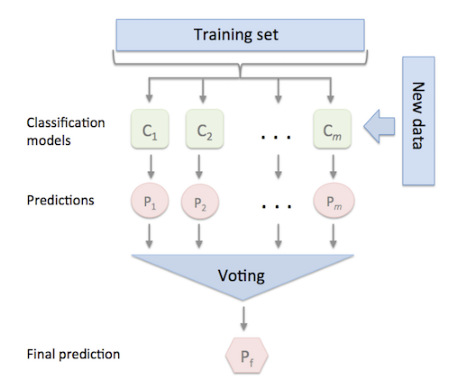


Möchten Sie ein anderes Modell ausprobieren? (Ja/Nein): 


In [ ]:
# Laden der Daten
data = laden()

# Splitten der Daten in X (Inputs) und y (Output)
[X,y] = split_data(data)

# Datenüberprüfung
X, y = check_data_for_errors(X, y)  

# Datenaufteilung
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Feature-Scaling
X_train, X_test = feature_scaling(X_train, X_test)

# Modellauswahl
model_switch = {
    '1': model_logistic_regression,
    '2': model_svm,
    '3': model_knn,
    '4': model_gaussian_nb,
    '5': model_decision_tree,
    '6': model_Random_forest,
    '7': model_Max_Voting,
    '8': model_Stacking,
    '9': model_Bagging,
    '10': model_Boosting
}

model_wahl = input('Soll das ML-Modell automatisch oder manuell ausgewählt werden?: ')

if model_wahl.lower() == 'automatisch':
    Evaluation = model_TPOTClassifier(X_train, y_train)
else:
    model_options = [
        '1: Logistic Regression',
        '2: Support Vector Machines',
        '3: K-Nearest Neighbors',
        '4: Naive Bayes',
        '5: Decision Trees',
        '6: Random Forest',
        '7: Max Voting',
        '8: Model Stacking',
        '9: Model Bagging',
        '10: Model Boosting'
    ]

    valid_choices = [str(i) for i in range(1, 11)]
    noch_ein_modell = 'ja'

    while noch_ein_modell == 'ja':
        print('\nWählen Sie ein Modell (1-10):')
        for option in model_options:
            print(option)

        model_wahl = input()
        while model_wahl not in valid_choices:
            print('Wählen Sie bitte eine Nummer von der Liste (1-10):')
            model_wahl = input()

        print(f'Sie haben Modell {model_wahl} gewählt.')
        
        trained_model = modell_auswahl_und_ausfuehrung(model_switch, X_train, y_train, X_test, y_test, model_wahl)
        
# Bild zeigen
        image_paths = {
            '10': 'Boosting_image.png',
            '9' : 'Bagging_image.png',
            '8' : 'stacking_image.png',
            '7' : 'max_voting_image.png'
                    }

        if model_wahl in image_paths:
            img = plt.imread(image_paths[model_wahl])
            plt.imshow(img)
            plt.axis('off')
            plt.show()

# Validierungsprozess
        if model_wahl not in ['7', '8', '9', '10']:
            validierung_technik_prozess(trained_model, X, y)

# fragen nach neues Modell
        print('\nMöchten Sie ein anderes Modell ausprobieren? (Ja/Nein): ')
        noch_ein_modell = input().strip().lower()
 